In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
plt.style.use("ggplot")
%matplotlib inline

In [2]:
def generate_sample(x_min=-3., x_max=3., sample_size=10):
    np.random.seed(1)
    x = np.linspace(x_min, x_max, num=sample_size)
    y = x + np.random.normal(loc=0., scale=.2, size=sample_size)
    y[-1] = y[-2] = y[1] = -4  # outliers
    return x, y

In [3]:
def design_matrix(x):
    return np.concatenate([np.ones(len(x))[:,None], x[:,None]], axis = 1)

def weight(r, eta):
    if np.abs(r) > eta:
        return 0
    else:
        return (1 - (r/eta)**2)**2

def calc_W(r, eta):
    w_array = np.array([weight(i,eta) for i in r])
    return np.diag(w_array)

In [4]:
def step_IRLS(theta, Phi, y, eta):
    r = np.matmul(Phi, theta) - y
    W = calc_W(r, eta)
    left = np.matmul(np.matmul(Phi.T, W), Phi)
    right = np.matmul(np.matmul(Phi.T, W), y)
    return np.matmul(np.linalg.inv(left), right)

def IRLS(initial_theta, Phi, y, eta, total_step=10):
    theta = initial_theta
    for i in range(total_step):
        theta = step_IRLS(theta, Phi, y, eta)
    return theta

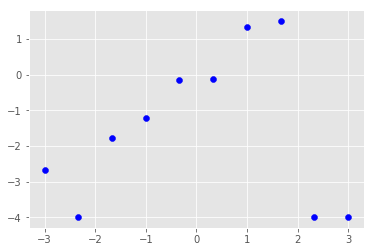

In [5]:
#Data Generation
x, y = generate_sample()
plt.scatter(x,y, color='b')

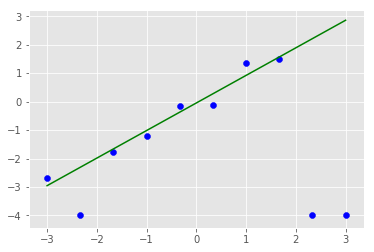

In [6]:
#Settings
eta = 2
initial_theta = np.array([0, 0])
Phi = design_matrix(x)

#Fitting
theta = IRLS(initial_theta, Phi, y, eta, total_step=10)

#Plot
plt.plot(np.linspace(-3,3,100), theta[0] + np.linspace(-3,3,100) * theta[1], color='g')
plt.scatter(x,y, color='b')